이 대회에서 Kaggle은 뉴욕시에서 택시 여행의 총 승차 시간을 예측하는 모델을 구축하는 데 도전하고 있습니다. 기본 데이터 세트는 픽업 시간, 지리적 좌표, 승객 수 및 기타 여러 변수를 포함하는 NYC Taxi and Limousine Commission에서 발표 한 것입니다.

ID - 각 여행에 대한 고유 식별자

vendor_id - 여행 레코드와 연결된 공급자를 나타내는 코드
pickup_datetime - 미터가 종사한 날짜 및 시간

dropoff_datetime - 미터가 분리된 날짜 및 시간

passenger_count - 차량의 승객 수 (운전자가 값을 입력)

pickup_longitude - 미터가 종사하는 경도

pickup_latitude - 미터가 종사하는 위도

dropoff_longitude - 미터가 분리 된 경도

dropoff_latitude - 미터가 분리 된 위도

store_and_fwd_flag - 이 플래그는 차량이 서버에 연결되지 않았기 때문에 공급업체에 보내기 전에 여행 기록이 차량 메모리에 보관되었는지 여부를 나타냅니다- Y=저장소 및 앞으로; N=하지 상점 및 앞으로 여행

trip_duration - 초 여행의 기간

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [ ]:
submission.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


In [ ]:
print(train.columns)
print('='*70)
print(test.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')
Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')


In [ ]:
train.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Columns: 11 entries, id to trip_duration
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
print(train.shape)
print(test.shape)

(1458644, 11)
(625134, 9)


In [ ]:
train['trip_duration'].value_counts() #

368      1624
408      1584
348      1582
367      1581
358      1577
         ... 
85305       1
83256       1
83884       1
6419        1
8522        1
Name: trip_duration, Length: 7417, dtype: int64

In [ ]:
print(train.isnull().sum())
print(train.isnull().sum().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64
0


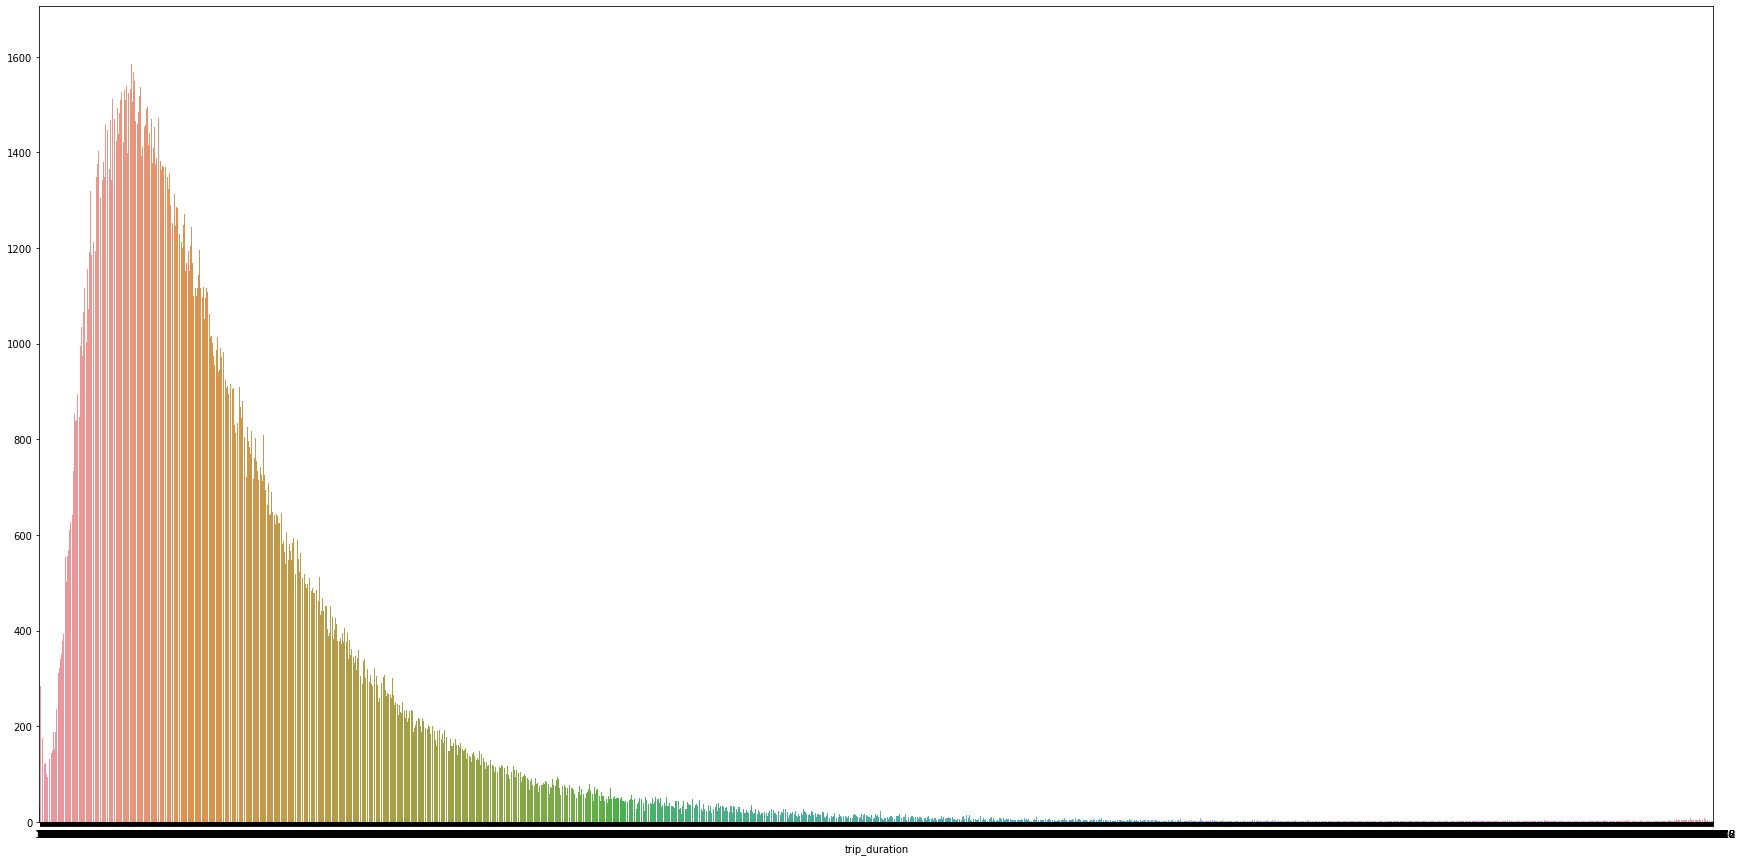

In [ ]:
plt.subplots(figsize=(30,15))
long = train.groupby(['trip_duration'])['id'].count()
sns.barplot(x=long.index,y=long.values)

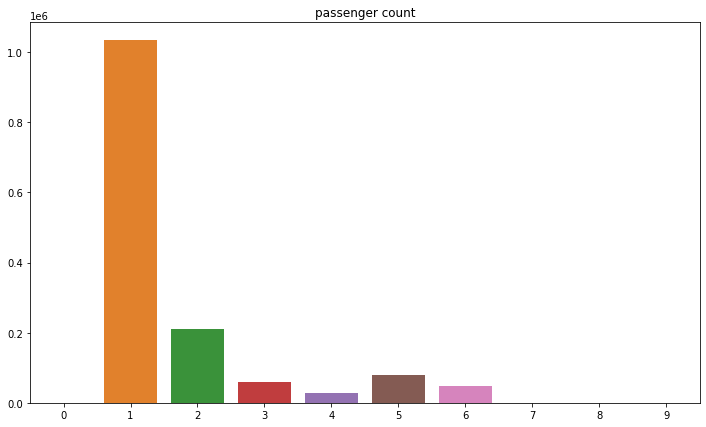

In [ ]:
plt.figure(figsize=(12,7))
long = train['passenger_count'].value_counts()
sns.barplot(long.index, long.values)
plt.title('passenger count')
plt.show()

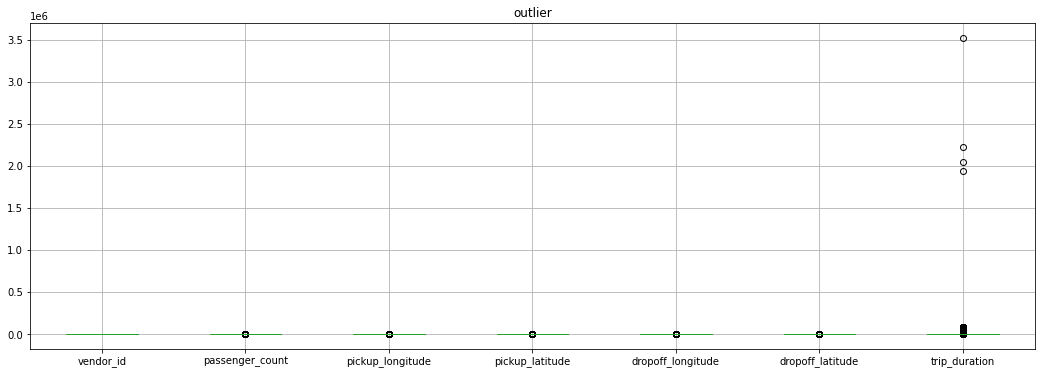

In [ ]:
# outlier 이상치 확인
plt.subplots(figsize=(18,6))
plt.title('outlier')
train.boxplot();

In [ ]:
# 이상치 찾기 - trip_duration 컬럼만 이상치가 존재한다.
# 이상치 공식 - outlier = 1.5 * IQR - 25% outlier = 1.5 * IQR + 75%
Q1 = np.percentile(train['trip_duration'],25)
Q3 = np.percentile(train['trip_duration'],75)
IQR = Q3-Q1
outlier1 = 1.5*IQR-Q1
outlier2 = 1.5*IQR+Q3

In [ ]:
print(outlier1) # 작은 이상치
print(outlier2) # 큰 이상치

620.0
2092.0


In [ ]:
train = train[(train['trip_duration']<2092)] # 이상치부분은 잘라내고 설정
# train = train[(train.trip_duration < 5000)] 
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
train["pickup_datetime"] = pd.to_datetime(train.pickup_datetime)
test["pickup_datetime"] = pd.to_datetime(test.pickup_datetime)

In [ ]:
train['pickup_datetime']

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1454870, dtype: datetime64[ns]

In [ ]:
test['pickup_datetime']

0        2016-06-30 23:59:58
1        2016-06-30 23:59:53
2        2016-06-30 23:59:47
3        2016-06-30 23:59:41
4        2016-06-30 23:59:33
                 ...        
625129   2016-01-01 00:02:52
625130   2016-01-01 00:01:52
625131   2016-01-01 00:01:24
625132   2016-01-01 00:00:28
625133   2016-01-01 00:00:22
Name: pickup_datetime, Length: 625134, dtype: datetime64[ns]

In [ ]:
train['week'] = train.pickup_datetime.dt.week #주
train['weekday'] = train.pickup_datetime.dt.weekday #주일
train['hour'] = train.pickup_datetime.dt.hour #시간
test['week'] = test.pickup_datetime.dt.week
test['weekday'] = test.pickup_datetime.dt.weekday
test['hour'] = test.pickup_datetime.dt.hour

train['month'] = train.pickup_datetime.dt.month #달
test['month'] = test.pickup_datetime.dt.month

In [ ]:
'''
# 실험용
# week,weekday,hour 이외에 다른것 테스트

train_ex = train
test_ex = test

train_ex['time'] = train_ex.pickup_datetime.dt.time
#train_ex['second'] = train_ex.pickup_datetime.dt.second
#train_ex['minute'] = train_ex.pickup_datetime.dt.minute
test_ex['time'] = test_ex.pickup_datetime.dt.time
#test_ex['second'] = test_ex.pickup_datetime.dt.second
#test_ex['minute'] = test_ex.pickup_datetime.dt.minute
train_ex['month'] = train_ex.pickup_datetime.dt.month
test_ex['month'] = test_ex.pickup_datetime.dt.month

train_ex['quarter '] = train_ex.pickup_datetime.dt.quarter 
train_ex['weekofyear'] = train_ex.pickup_datetime.dt.weekofyear
train_ex['dayofyear'] = train_ex.pickup_datetime.dt.dayofyear
test_ex['quarter '] = test_ex.pickup_datetime.dt.quarter 
test_ex['weekofyear'] = test_ex.pickup_datetime.dt.weekofyear
test_ex['dayofyear'] = test_ex.pickup_datetime.dt.dayofyear
train_ex['days_in_month'] = train_ex.pickup_datetime.dt.days_in_month
test_ex['days_in_month'] = test_ex.pickup_datetime.dt.days_in_month

corr = train_ex.corr()
plt.subplots(figsize=(20,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # 히트맵 스타일
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.7, cbar_kws={"shrink": .5})
plt.show()
'''

'\n# 실험용\n# week,weekday,hour 이외에 다른것 테스트\n\ntrain_ex = train\ntest_ex = test\n\ntrain_ex[\'time\'] = train_ex.pickup_datetime.dt.time\n#train_ex[\'second\'] = train_ex.pickup_datetime.dt.second\n#train_ex[\'minute\'] = train_ex.pickup_datetime.dt.minute\ntest_ex[\'time\'] = test_ex.pickup_datetime.dt.time\n#test_ex[\'second\'] = test_ex.pickup_datetime.dt.second\n#test_ex[\'minute\'] = test_ex.pickup_datetime.dt.minute\ntrain_ex[\'month\'] = train_ex.pickup_datetime.dt.month\ntest_ex[\'month\'] = test_ex.pickup_datetime.dt.month\n\ntrain_ex[\'quarter \'] = train_ex.pickup_datetime.dt.quarter \ntrain_ex[\'weekofyear\'] = train_ex.pickup_datetime.dt.weekofyear\ntrain_ex[\'dayofyear\'] = train_ex.pickup_datetime.dt.dayofyear\ntest_ex[\'quarter \'] = test_ex.pickup_datetime.dt.quarter \ntest_ex[\'weekofyear\'] = test_ex.pickup_datetime.dt.weekofyear\ntest_ex[\'dayofyear\'] = test_ex.pickup_datetime.dt.dayofyear\ntrain_ex[\'days_in_month\'] = train_ex.pickup_datetime.dt.days_in_month\ntest

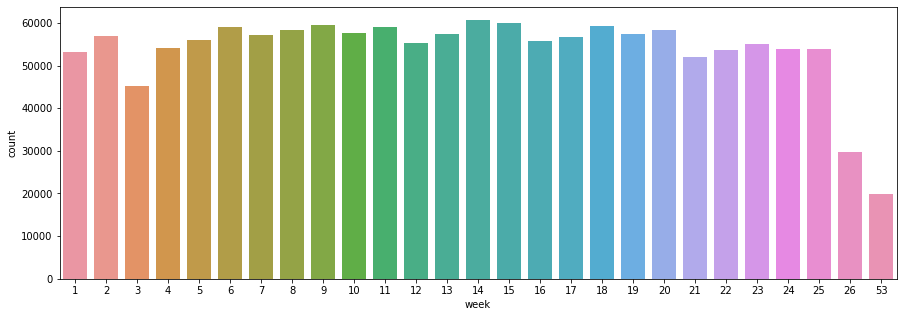

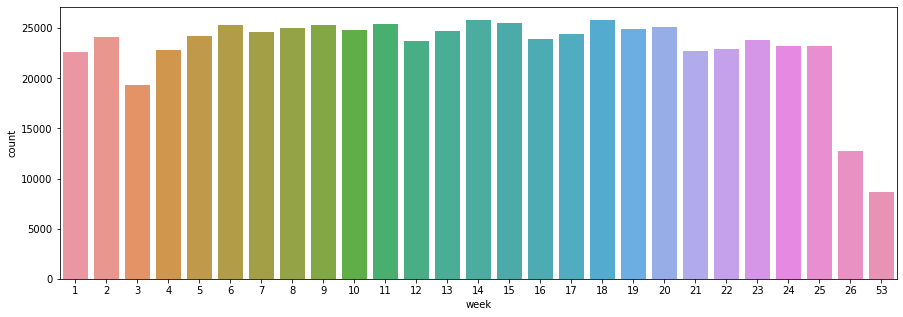

In [ ]:
v1 = plt.figure(figsize=(15,5))
sns.countplot(x='week', data=train)
plt.show()

v2 = plt.figure(figsize=(15,5))
sns.countplot(x='week', data=test)
plt.show()

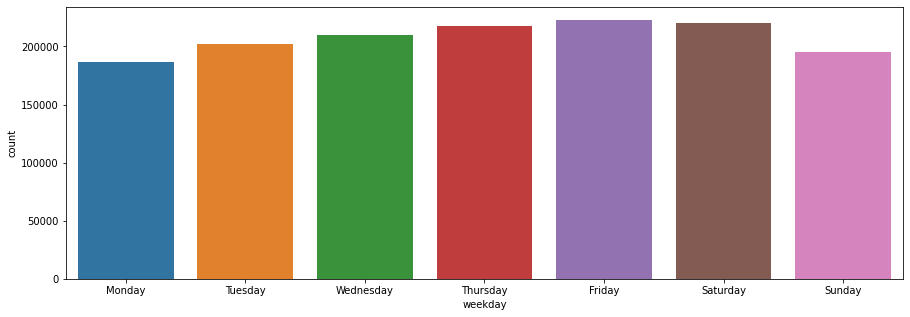

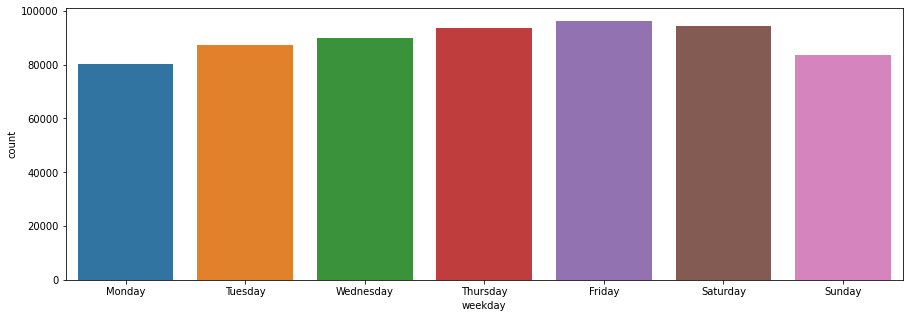

In [ ]:
v1 = plt.figure(figsize=(15,5))
days = [i for i in range(7)]
sns.countplot(x='weekday', data=train)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

v2 = plt.figure(figsize=(15,5))
days = [i for i in range(7)]
sns.countplot(x='weekday', data=test)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

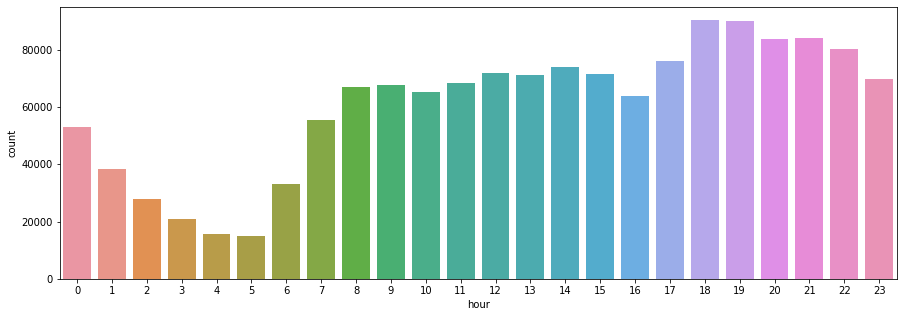

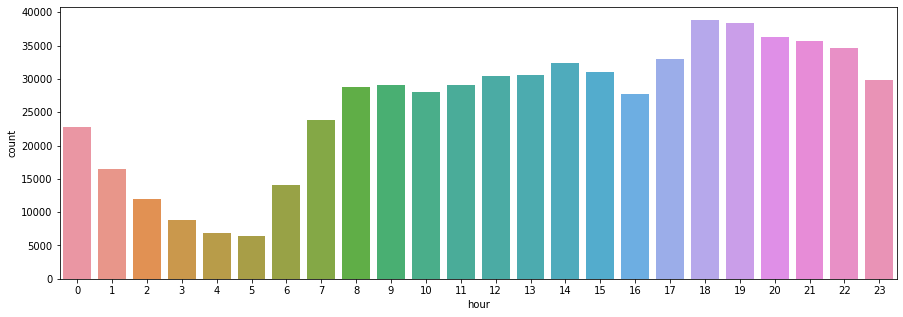

In [ ]:
v1 = plt.figure(figsize=(15,5))
sns.countplot(x='hour', data=train)
plt.show()

v2 =plt.figure(figsize=(15,5))
sns.countplot(x='hour', data=test)
plt.show()

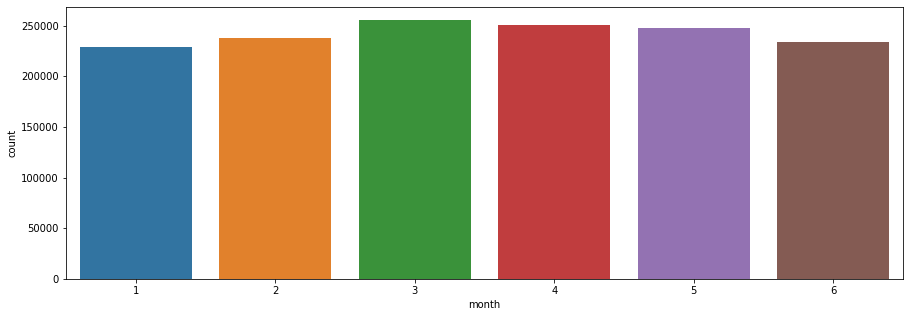

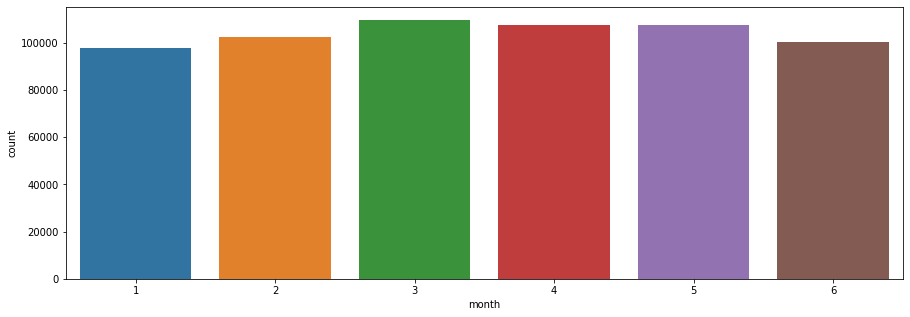

In [ ]:
v1 = plt.figure(figsize=(15,5))
sns.countplot(x='month', data=train)
plt.show()

v2 =plt.figure(figsize=(15,5))
sns.countplot(x='month', data=test)
plt.show()

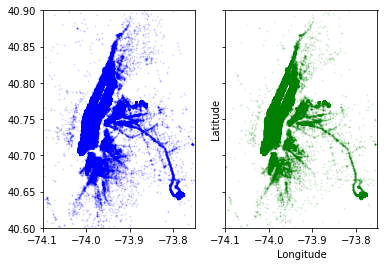

In [ ]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
long_border = (-74.1, -73.75)
lat_border = (40.6, 40.9)
plt.ylim(lat_border)
plt.xlim(long_border)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax[0].scatter(train.pickup_longitude,train.pickup_latitude,color='blue',s=1,alpha=0.1)
ax[1].scatter(test.pickup_longitude,test.pickup_latitude,color='green',s=1,alpha=0.1)
plt.show()

In [ ]:
train.pickup_longitude.value_counts()

-73.982201    633
-73.982140    603
-73.982101    585
-73.982117    584
-73.982224    582
             ... 
-73.885712      1
-73.891502      1
-73.865181      1
-73.861656      1
-73.792320      1
Name: pickup_longitude, Length: 22989, dtype: int64

In [ ]:
# train = train[train['pickup_longitude']>73.95]

In [ ]:
train.pickup_latitude.value_counts()

40.774101    412
40.774090    410
40.774120    408
40.774109    391
40.774078    389
            ... 
40.661869      1
40.661961      1
40.661797      1
40.661804      1
40.694256      1
Name: pickup_latitude, Length: 45192, dtype: int64

In [ ]:
# train = train[train['pickup_longitude']>40.77]

In [ ]:
long # 0은 필요없음

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [ ]:
train = train[(train.passenger_count > 0)] # 지우기 완료

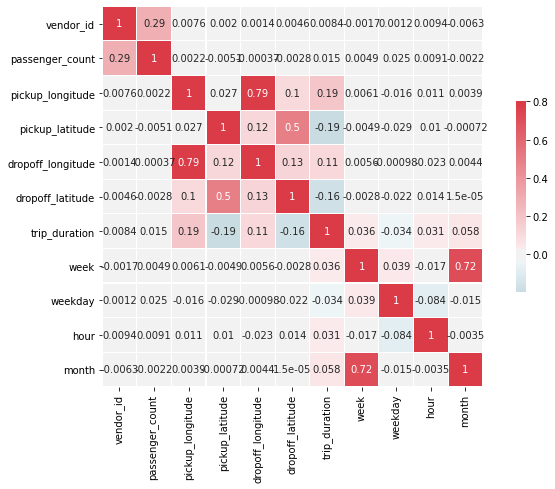

In [ ]:
corr = train.corr()
plt.subplots(figsize=(12,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # 히트맵 스타일
sns.heatmap(corr, cmap=cmap, vmax=.8, center=0,square=True, annot =True, linewidths=0.1, cbar_kws={"shrink": 0.5})
plt.show()

In [ ]:
train.columns,test.columns

(Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
        'passenger_count', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
        'trip_duration', 'week', 'weekday', 'hour', 'month'],
       dtype='object'),
 Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
        'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
        'dropoff_latitude', 'store_and_fwd_flag', 'week', 'weekday', 'hour',
        'month'],
       dtype='object'))

In [ ]:
X_train = train.loc[:,['month','weekday','hour','week','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
X_test = test.loc[:,['month','weekday','hour','week','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
y_train = train['trip_duration'] 
X_train.shape, y_train.shape

((1454811, 9), (1454811,))

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [ ]:
xgb_model = xgb.XGBRegressor( max_depth=15, learning_rate=0.1, n_estimators=700, silent=True, objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain', )
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=700,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [ ]:
y_test_pred = xgb_model.predict(X_test)

In [ ]:
submission['trip_duration'] = y_test_pred
submission.head()

,id,trip_duration
0,id3004672,722.973999
1,id3505355,675.554504
2,id1217141,412.948944
3,id2150126,1000.767334
4,id1598245,375.195160


In [ ]:
submission.to_csv("submission.csv", index=False)

https://www.kaggle.com/c/nyc-taxi-trip-duration/submissions